🌲 Random Forest 정확도: 0.9649
🚀 Gradient Boosting 정확도: 0.9561


/tmp/ipython-input-2412514988.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = importances[indices], y=[feature_names[i] for i in indices], ax=ax, palette=color)
/tmp/ipython-input-2412514988.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = importances[indices], y=[feature_names[i] for i in indices], ax=ax, palette=color)


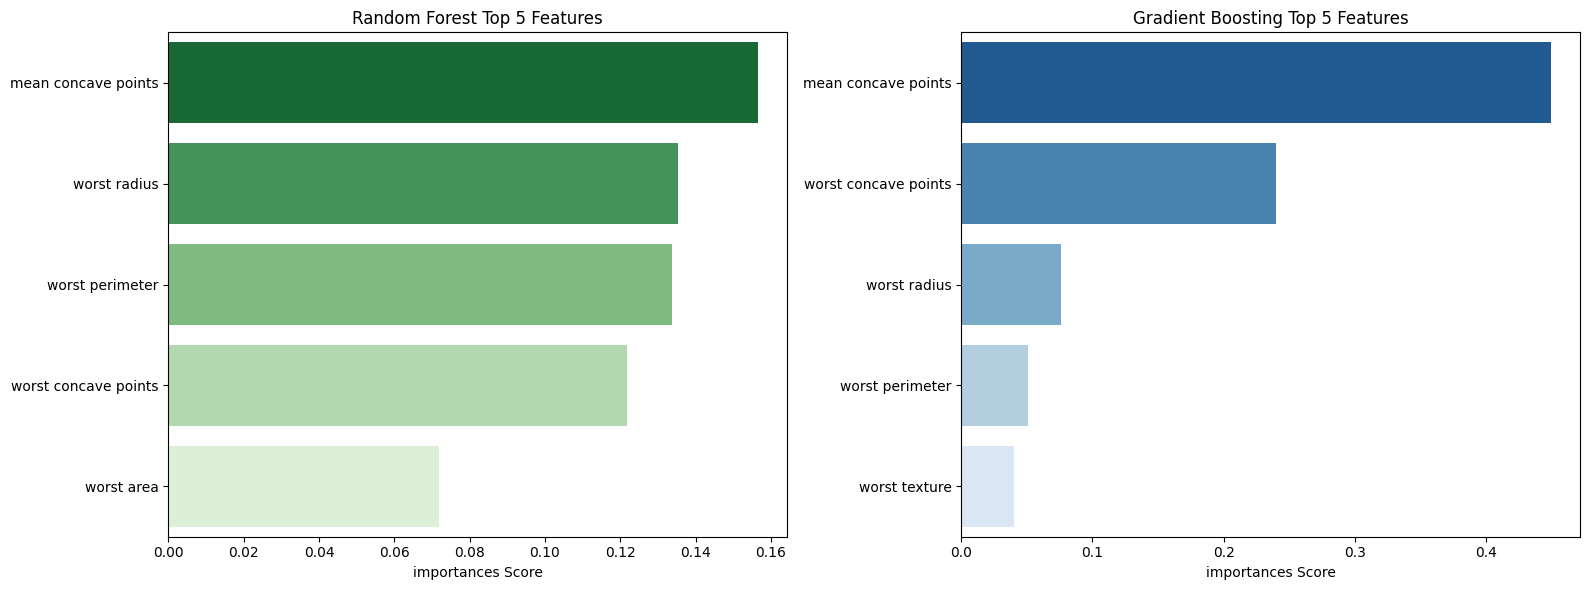

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)

gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)
gb_acc = accuracy_score(y_test, gb_pred)

print(f"🌲 Random Forest 정확도: {rf_acc:.4f}")
print(f"🚀 Gradient Boosting 정확도: {gb_acc:.4f}")

def plot_top5_features(model, feature_names, ax, title, color):
  importances = model.feature_importances_
  indices = importances.argsort()[::-1][:5]
  sns.barplot(x = importances[indices], y=[feature_names[i] for i in indices], ax=ax, palette=color)
  ax.set_title(title)
  ax.set_xlabel('importances Score')

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
plot_top5_features(rf_model, data.feature_names, axes[0], f"Random Forest Top 5 Features", "Greens_r")
plot_top5_features(gb_model, data.feature_names, axes[1],f"Gradient Boosting Top 5 Features", "Blues_r")
plt.tight_layout()
plt.show()
